In [78]:
# MNIST 데이터셋 받기 #

from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz') 

In [48]:
# 데이터 형태 확인 #

# 학습 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 텍스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


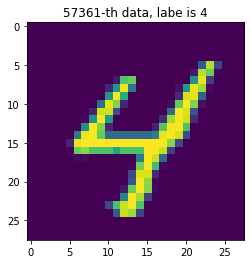

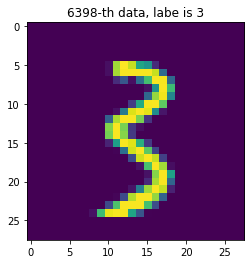

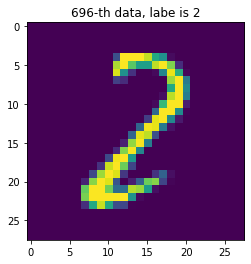

In [52]:
# 데이터 그려보기 #

import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
# 0~59999의 범위에서 무작위로 세 개의 정수를 뽑음
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, labe is %d' %(idx, label))

In [53]:
# 검증 데이터 만들기 #

from sklearn.model_selection import train_test_split

# 훈련 / 테스트 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)
print(f'훈련데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련데이터 (42000, 28, 28) 레이블 (42000,)
검증데이터 (18000, 28, 28) 레이블 (18000,)


In [54]:
# 모델 입력을 위한 데이터 전처리 #

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)    # 모델 입력을 위해 데이터를 784차원으로 변경


(42000, 784)


In [55]:
# 모델을 위한 레이블 전처리

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 형태를 꼭 명시
# 748차원의 데이터를 입력받고 64개릐 출력을 가지는 첫번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))       # 32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax'))    # 10개의 출력을 가지는 신경망


In [57]:
# 소프트맥스와 시그모이드 값의 비교 #

def softmax(arr):
    m = np.max(arr)
    arr = arr - m   # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)   # numpy 소수점 제한 
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')


sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [58]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['acc'])
            # 옵티마이저: Adam, 손실함수: categorical_crossentropy, 모니터할 평가지표: acc

In [59]:
history = model.fit(x_train, y_train, epochs=30, 
                    batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4978 - acc: 0.8611 - val_loss: 0.2500 - val_acc: 0.9288
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.2139 - acc: 0.9389 - val_loss: 0.1897 - val_acc: 0.9471
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1621 - acc: 0.9526 - val_loss: 0.1587 - val_acc: 0.9547
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1292 - acc: 0.9626 - val_loss: 0.1392 - val_acc: 0.9583
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1084 - acc: 0.9685 - val_loss: 0.1297 - val_acc: 0.9612
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0913 - acc: 0.9734 - val_loss: 0.1269 - val_acc: 0.9617
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0789 - acc: 0.9770 - val_loss: 0.1186 - val_acc: 0.9649
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

In [60]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

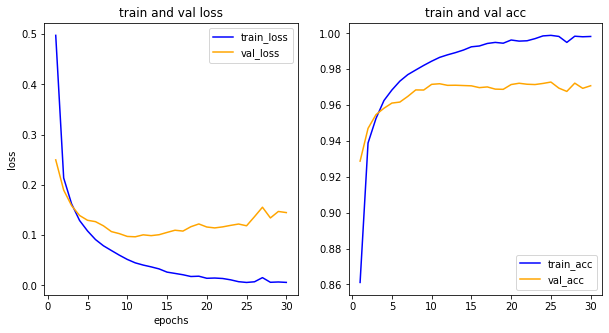

In [61]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']     # 검증 데이터가 있는 경우 val_ 수식어가 붙음.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs', color = 'white')
ax2.set_ylabel('loss', color = 'white')
ax2.legend()

plt.show()

In [62]:
# 모델 평가 #

model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 962us/step - loss: 0.1357 - acc: 0.9722


[0.13569855690002441, 0.9721999764442444]

In [64]:
# 학습된 모델을 통해 값 예측 #

import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

313/313 [==============================] - 0s 834us/step
(10000, 10)
각 클래스에 속할 확률 : 
[6.6534264e-11 9.0544638e-12 7.2131094e-08 5.6964541e-06 6.1563182e-17
 8.1391775e-11 1.3131139e-23 9.9999404e-01 1.1257046e-09 9.9756342e-08]


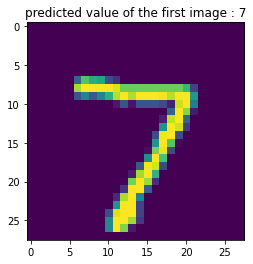

In [65]:
# 예측값 그려서 확인 #

import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)     # 가장 큰 값의 인덱스를 가져온다
plt.imshow(x_test[0].reshape(28, 28))
plt.title('predicted value of the first image : ' + str(arg_results[0]))
plt.show()

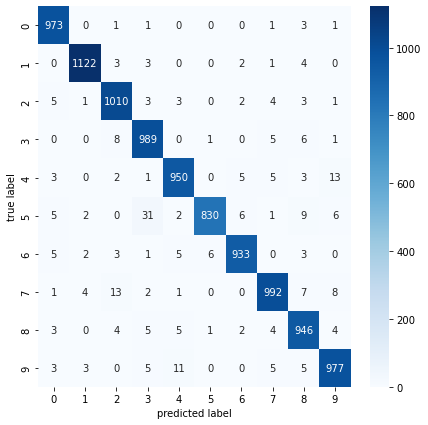

In [70]:
# 모델 평가 방법 1 - 혼동 행렬 #

#sklearn.metrics 모듈은 여러 가지 편가지표에 관한 기능을 제공
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동행렬 만들기
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [71]:
# 모델 평가 방법 2 - 분류 보고서 #

print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.93      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [81]:
# MNIST 데이터셋 다루기 : 전체 코드 # 

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (783, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

# model.evaludate(x_test, y_test)
results = model.predict(x_test)
